# Building and Studying a tiny model

In [2]:
import sys

!{sys.executable} -m pip install cobra

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 5.1 MB/s eta 0:00:00
  Using cached future-0.18.3.tar.gz (840 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 8.2 MB/s eta 0:00:00a 0:00:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.8/239.8 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.8/737.8 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 11.4 MB/s eta 0:00:0

*Exercice 1*

Manipulate the following tiny toy example by following the indications in the python notebook file. More specifically, perform an FBA optimization, a FVA, manipulate the model,….
~~~~
R1 : 2A + B —> C
R2 : B + C —> D + 2E
R3 : 4A —> D
R4 : —> A
R5 : —> B
R6 : D —>
R7 : E —>
~~~~
Preliminary question : Try to understand how cobra allows a modelization of this model

Question 1 : Write the stoichiometric matrix

Question 2 : Write the linear system that has to be solved

Question 3 : Suppose that we observe V4 = 1 and V7 = 1 and solve the system

Question 4 : Suppose that we observe V4 = 1 and V7 = 2 and solve the system

Question 5 : All the reactions are irreversible. Plot the solution set. Suppose now that V4>1 and V7>1.

Question 6 : One has V4 < 6 and V7<4. What is the solution that maximizes V4+V7 ?

In [5]:
# Importing the cobra library
import cobra
from cobra import Model, Reaction, Metabolite

# step 1 : Constructing a metabolic model

model = Model('example_model')

# set of reactions
reactions = dict()
for i in range(1,8):
    reactions["R"+str(i)] = Reaction("R"+str(i))
    reactions["R"+str(i)].name = "R"+str(i)
    reactions["R"+str(i)].subsystem = 'Body'
    reactions["R"+str(i)].lower_bound = 0.  # This is the default
    reactions["R"+str(i)].upper_bound = 1000.  # This is the default
    #reactions["R"+str(i)].objective_coefficient = 0. # this is the default
    print ("Creating R"+str(i))
# set of metabolites
A = Metabolite('A', name='A', compartment='c')
B = Metabolite('B', name='B', compartment='c')
C = Metabolite('C', name='C', compartment='c')
D = Metabolite('D', name='D', compartment='c')
E = Metabolite('E', name='E', compartment='c')
F = Metabolite('F', name='F', compartment='c')

reactions["R1"].add_metabolites({A:-2, B:-1, C: 1})
reactions["R2"].add_metabolites({B:-1, C:-1, D: 1, E: 2})
reactions["R3"].add_metabolites({A:-4, D: 1})
reactions["R4"].add_metabolites({A:1})
reactions["R5"].add_metabolites({B:1})
reactions["R6"].add_metabolites({D: -1})
reactions["R7"].add_metabolites({E: -1})


reactions["R4"].lower_bound = 1
reactions["R4"].upper_bound = 6
reactions["R7"].lower_bound = 1
reactions["R7"].upper_bound = 4

for i in range(1,8):
    model.add_reactions([reactions["R"+str(i)]])



Creating R1
Creating R2
Creating R3
Creating R4
Creating R5
Creating R6
Creating R7


In [ ]:
pip install cobra

In [14]:
# setting the objective

#model.reactions.R4.objective_coefficient=1
#model.reactions.R7.objective_coefficient=-1

# or alternative solution
model.objective= -model.reactions.R4.flux_expression + model.reactions.R7.flux_expression

In [12]:
# Display some informations on the model (part 1)
print ("Number of metabolites = ",len(model.metabolites))
print ("Number of reactions = ",len(model.reactions))

Number of metabolites =  5
Number of reactions =  7


In [9]:
# Display some informations on the model (part 2)

print ("Reaction 2 is ", model.reactions[2].build_reaction_string(), "lb = ", model.reactions[2].lower_bound, "ub = ", model.reactions[2].upper_bound)

# Question : Write a loop in order to get all the reactions

Reaction 2 is  4 A --> D lb =  0.0 ub =  1000.0


In [15]:
# Perform a FBA optimization
f=model.optimize()
print ("optimal value=",f.objective_value)
print ("corresponding fluxes = ",f.fluxes)

# a nicer view with pandas library
import pandas
pandas.DataFrame.from_dict({"fluxes": f.fluxes})

optimal value= 0.0
corresponding fluxes =  R1    0.5
R2    0.5
R3    0.0
R4    1.0
R5    1.0
R6    0.5
R7    1.0
Name: fluxes, dtype: float64


,fluxes
R1,0.5
R2,0.5
R3,0.0
R4,1.0
R5,1.0
R6,0.5
R7,1.0


In [17]:
model.objective= -model.reactions.R1.flux_expression

f=model.optimize()

print(f.objective_value)

-0.5


In [10]:
# Question: Get the minimal and maximal values of all the fluxes in the solution space


In [22]:
model.objective = model.reactions.R4.flux_expression + model.reactions.R7.flux_expression

# Change the model in order to get the min/min values of all the fluxes when V4+V7 is above 90% of its maximal value

# compare with 
import cobra
cobra.flux_analysis.flux_variability_analysis(model,fraction_of_optimum=0.9)

,minimum,maximum
R1,1.50,2.00
R2,1.50,2.00
R3,0.25,0.75
R4,5.00,6.00
R5,3.00,4.00
R6,2.25,2.50
R7,3.00,4.00


# Study of bigger models

*Exercise 2*

Get the ecoli_core model of Echerischia coli metabolism in the BiGG model repository here [http://bigg.ucsd.edu](http://bigg.ucsd.edu).

1. Execute a for loop on all the reactions and print their id and objective coefficient. Verify that the model possesses an objective and if not, use the model.reactions.get_by_id to set the objective coefficient of the biomass to 1.
2. Perform a FBA study. Count the number of reactions having a flux equal to zero.
3. Perform a FVA study. Report the reactions having a fixed flux. Classify the reactions into 3 classes: blocked reactions having a fixed flux equal to 0; essential reactions whose flux is either strictly positive or strictly negative; and alternative reactions whose flux can be positive or negative. 
4. Perform a FVA study at 90%. Same questions as previously.
5. Study the effect of glucose disposability (i.e., store in an array the values of the optimal biomass, obtained by a FBA study, when the lower_bound of the ‘EX_glc_D_e’ reaction range from -1000 to 0 and plot the resulting values)
6. A reaction is said to be required for biomass iff setting the reaction flux to 0 imply a decrease of the biomass growth by more than 90%. Report all the required reactions.



In [33]:
import pandas

# You can use this model from the tutorial
#model = cobra.test.create_test_model("ecoli")

# or this one that must be in the home folder
model = cobra.io.read_sbml_model("e_coli_core.xml")

In [26]:
# Question: list all the reactions and print their contributions to the objective

for r in model.reactions:
    print(r, r.objective_coefficient)



ACALD: acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c 0.0
ACALDt: acald_e <=> acald_c 0.0
ACKr: ac_c + atp_c <=> actp_c + adp_c 0.0
ACONTa: cit_c <=> acon_C_c + h2o_c 0.0
ACONTb: acon_C_c + h2o_c <=> icit_c 0.0
ACt2r: ac_e + h_e <=> ac_c + h_c 0.0
ADK1: amp_c + atp_c <=> 2.0 adp_c 0.0
AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c 0.0
AKGt2r: akg_e + h_e <=> akg_c + h_c 0.0
ALCD2x: etoh_c + nad_c <=> acald_c + h_c + nadh_c 0.0
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c 0.0
ATPS4r: adp_c + 4.0 h_e + pi_c <=> atp_c + h2o_c + 3.0 h_c 0.0
BIOMASS_Ecoli_core_w_GAM: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c 1.0
CO2t: co2_e <=> co2_c 0.0
CS: accoa_c + h2o_c + oaa_c --> cit_c + co

In [29]:
# Question: how many reactions have a zero 0 for an optimal solution

f=model.optimize()

print(f.objective_value)
print(f.fluxes)

n=0
for flux in f.fluxes:
    if abs(flux)<0.00000000001:
        n=n+1
        
print(n)

0.8739215069684305
ACALD     0.000000
ACALDt    0.000000
ACKr      0.000000
ACONTa    6.007250
ACONTb    6.007250
            ...   
TALA      1.496984
THD2      0.000000
TKT1      1.496984
TKT2      1.181498
TPI       7.477382
Name: fluxes, Length: 95, dtype: float64
47


In [52]:
fva = cobra.flux_analysis.flux_variability_analysis(model,fraction_of_optimum=0)

In [53]:
blocked=0
essential=0

for v in range(len(fva["minimum"])):
    if abs(fva.get("minimum").get(v))+abs(fva.get("maximum").get(v))<0.000000001:
        blocked=blocked+1
    if fva.get("minimum").get(v) > 0.0000001:
        essential = essential + 1
    if fva.get("maximum").get(v) < -0.0000001:
        essential = essential + 1
print(blocked, "blocked reactions")
print(essential, "essential reactions")
print(len(model.reactions)-essential-blocked, "alternative reactions")

        

8 blocked reactions
3 essential reactions
84 alternative reactions


/var/folders/vj/0m9n8yhs5xgc6pqz39wn93sw0000gp/T/ipykernel_99568/2768481327.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(fva.get("minimum").get(v))+abs(fva.get("maximum").get(v))<0.000000001:
/var/folders/vj/0m9n8yhs5xgc6pqz39wn93sw0000gp/T/ipykernel_99568/2768481327.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if fva.get("minimum").get(v) > 0.0000001:
/var/folders/vj/0m9n8yhs5xgc6pqz39wn93sw0000gp/T/ipykernel_99568/2768481327.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFr

In [63]:
model.reactions.EX_glc__D_e.lower_bound=-5000

In [64]:
fba=model.optimize()

In [65]:
fba.objective_value

34.047310037810135

In [66]:
fba.fluxes.get("EX_glc__D_e")

-575.2442772222059

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


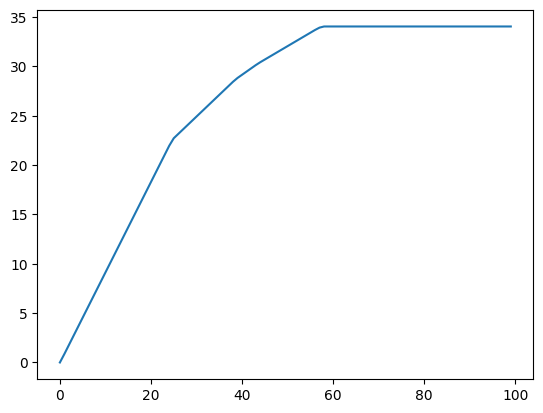

In [67]:
T=[0]*100

for i in range(100):
    model.reactions.EX_glc__D_e.lower_bound=i*(-10)
    fba=model.optimize()
    T[i]=fba.objective_value

import matplotlib.pyplot as plt

plt.plot(T)
plt.show()
plt.close()


In [68]:
model = cobra.io.read_sbml_model("e_coli_core.xml")




In [69]:
fba_ref = model.optimize()

In [70]:
print(fba_ref.objective_value)

0.8739215069684279


In [72]:
for r in model.reactions:
    tmp_lb = r.lower_bound
    tmp_ub = r.upper_bound
    r.lower_bound = 0
    r.upper_bound = 0
    fba = model.optimize()
    if fba.objective_value < 0.9*fba_ref.objective_value:
        print(r)
    r.lower_bound = tmp_lb
    r.upper_bound = tmp_ub

    
for r in model.reactions:
    copie = model.copy()
    r_copie = copie.reactions.get_by_id(r.id)
    r_copie.lower_bound = 0
    r_copie.upper_bound = 0
    fba = copie.optimize()
    if fba.objective_value < 0.9*fba_ref.objective_value:
        print(r_copie)


    







ACALD: acald_c + coa_c + nad_c --> accoa_c + h_c + nadh_c
ACALDt: acald_e --> acald_c
ACKr: ac_c + atp_c --> actp_c + adp_c
ACONTa: cit_c --> acon_C_c + h2o_c
ACONTb: acon_C_c + h2o_c --> icit_c
ACt2r: ac_e + h_e --> ac_c + h_c
ADK1: amp_c + atp_c --> 2.0 adp_c
AKGDH: akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
AKGt2r: akg_e + h_e --> akg_c + h_c
ALCD2x: etoh_c + nad_c --> acald_c + h_c + nadh_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
ATPS4r: adp_c + 4.0 h_e + pi_c --> atp_c + h2o_c + 3.0 h_c
BIOMASS_Ecoli_core_w_GAM: 1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
CO2t: co2_e --> co2_c
CS: accoa_c + h2o_c + oaa_c --> cit_c + coa_c + h_c
CYTBD: 2.0 h_c + 0.5 o2_c + q8h2_c --> h2o_c +

In [79]:
model = cobra.io.read_sbml_model("e_coli_core.xml")


for r in model.reactions:
    print(r.id, "|", r.gene_reaction_rule)

ACALD | b0351 or b1241
ACALDt | s0001
ACKr | b2296 or b3115 or b1849
ACONTa | b0118 or b1276
ACONTb | b0118 or b1276
ACt2r | 
ADK1 | b0474
AKGDH | b0726 and b0116 and b0727
AKGt2r | b2587
ALCD2x | b1478 or b0356 or b1241
ATPM | 
ATPS4r | (b3738 and b3736 and b3737 and b3735 and b3733 and b3731 and b3732 and b3734) or (b3734 and b3732 and b3731 and b3733 and b3735 and b3737 and b3736 and b3738 and b3739)
BIOMASS_Ecoli_core_w_GAM | 
CO2t | s0001
CS | b0720
CYTBD | (b0978 and b0979) or (b0733 and b0734)
D_LACt2 | b2975 or b3603
ENO | b2779
ETOHt2r | 
EX_ac_e | 
EX_acald_e | 
EX_akg_e | 
EX_co2_e | 
EX_etoh_e | 
EX_for_e | 
EX_fru_e | 
EX_fum_e | 
EX_glc__D_e | 
EX_gln__L_e | 
EX_glu__L_e | 
EX_h_e | 
EX_h2o_e | 
EX_lac__D_e | 
EX_mal__L_e | 
EX_nh4_e | 
EX_o2_e | 
EX_pi_e | 
EX_pyr_e | 
EX_succ_e | 
FBA | b1773 or b2097 or b2925
FBP | b3925 or b4232
FORt2 | b0904 or b2492
FORt | b0904 or b2492
FRD7 | b4153 and b4151 and b4152 and b4154
FRUpts2 | b2415 and b1818 and b1817 and b1819 and b24

In [88]:
sgd = cobra.flux_analysis.double_gene_deletion(model)

In [90]:
fba = model.optimize()

In [105]:
model = cobra.io.read_sbml_model("e_coli_core.xml")
print(model.reactions.EX_o2_e.lower_bound)

-1000.0


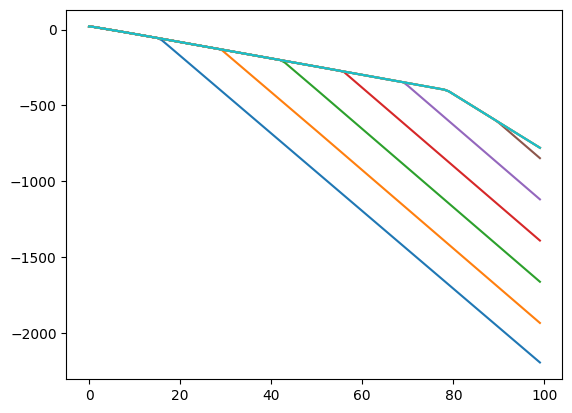

In [110]:

fba_ref=model.optimize()

for o in range(10):
    model = cobra.io.read_sbml_model("e_coli_core.xml")
    model.reactions.EX_o2_e.lower_bound=-(o+1)*100
    T=[0]*100
    
    for i in range(100):
        biomass = i*fba_ref.objective_value/100
        model.reactions.BIOMASS_Ecoli_core_w_GAM.upper_bound=biomass+0.0001
        model.reactions.BIOMASS_Ecoli_core_w_GAM.lower_bound=biomass-0.0001
        model.objective = model.reactions.EX_etoh_e.flux_expression
        fba = model.optimize()
        T[i] = fba.objective_value
    plt.plot(T)


plt.show()

In [87]:
for i in range(len(sgd.get("ids"))):
    if sgd.get("growth").get(i)<0.9*fba_ref.objective_value:
        print(sgd.get("ids").get(i), sgd.get("growth").get(i))

{'b3733'} 0.3742298749331101
{'b1136'} -3.340138673806149e-17


In [83]:
sgd

,ids,growth,status
0,{b1611},8.739215e-01,optimal
1,{b0811},8.739215e-01,optimal
2,{b2914},8.739215e-01,optimal
3,{b1621},8.739215e-01,optimal
4,{b1136},-1.347507e-15,optimal
...,...,...,...
132,{b1297},8.739215e-01,optimal
133,{b3739},8.739215e-01,optimal
134,{b0116},7.823511e-01,optimal
135,{b3386},8.739215e-01,optimal


# Genetic manipulations… and metabolic engineering

*Exercise 3* 

We will now work with the ecoli test model from cobrapy that contains some genetic reaction rules. `model = cobra.test.create_test_model(‘ecoli’)`
1. Print the reaction rule of all the reactions.
2. Perform a single deletion analysis (cobra.flux_analysis.single_deletion) and report all the gene such that, when knocked out, the biomass production is less than 90% its optimal value.

*Exercise 4*

This question can be tested by using any available e. coli model…
What is the optimal O2 condition if we want to produce alcohol with e. coli ? More precisely, we want to keep e. coli alive (so biomass>90% from its optimal), optimize the ethanol production and change the O2 rate exchange to see when the ethanol production is maximal…

# Metabolism and cancer…

There exists two main models repositories containing metabolic networks relative to human health : Virtual Metabolic Human, VMH ([https://vmh.uni.lu/](https://vmh.uni.lu/)) and Human Metabolic Atlas, HMA ([http://www.metabolicatlas.org/](http://www.metabolicatlas.org/)). Take a short tour on these repositories. 

*Exercise 5*

Consider first the HMA. Take 3 models of distinct cancer and compare the models by constructing Venn diagrams comparing the common reactions, the common genes,…

Notice that you will find three models from HMA in the moodle web site formatted in JSON exchange format.
The models can be loaded in python by using the cobra.io.load_json_model function.

Venn diagrams can be displayed by using the matplotlib-venn library (see [https://pypi.org/project/matplotlib-venn/](https://pypi.org/project/matplotlib-venn/) for details).

*Antimetabolites* are small molecules that mimics the chemical affinities of a given metabolite except, such taking its place in the chemical reactions, excepts that it blocks the functionality of the metabolite (i.e., the chemical reaction has no effects). They are commonly used as efficient cancer treatment strategies. It is thus possible, in a in silico study to block all reactions having a given metabolite as substrate and to report the metabolite having an effect on the cell growth.

*Exercise 6*

Consider the e coli model of BiGG and find antimetabolites having a putative effect. 

*Exercise 7*

The repository VMH contains the description of different diet conditions. Take some microbiote models from the download section and test the effect of different diet conditions on the biomass production and on the cholesterol export.